# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- LUNA Not Alone In Crimson: APE, AVAX, SOL, SHIB All Lose 20% In Crypto Crash.  The crypto market has deep-dived to 11% in just 24 hours. It’s been in the hole or behind and most coins (led by LUNA) have been suffering major losses such as Avalanche, ApeCoin, Solana, and Shiba Inu, to name a few. So, what’s happening here? It’s like a ripple or domino effect that has hit one and is now derailing the rest of the cryptocurrencies. Not Just LUNA LUNA has lost 97% of its value following the major dip of UST stablecoin. The losses of other coins are not as massive as Terra but they have also suffered devastating double-digit losses over the 24-hour time frame. Suggested Reading &#124; Shiba Inu Vs. Dogecoin And LUNA: Which One Will Survive The Crypto Carnage? Altcoins In The Red Most altcoins are in the red at this time. It’s a major blow in the crypto space and people are trying to analyze their cards. Avalanche has plummeted to 34% or under $32 and it even crashed below $28 which is far worse than its slump in August 2021. More so, Solana is now down by 26% which has further dropped to around $52 as of this writing. Luna is the cryptocurrency of Terra. Following the collapse of USDT or the dollar stablecoin, Luna also suffered a massive slump at 97% or below $1. BTC total market cap at $550.71 billion on the daily chart &#124; Source: TradingView.com ADA of Cardano has also slid down by 16% or $0.56 displaying tremendous dips comparable to what transpired in February 2021. Additionally, Polkadot (DOT) has al... ... [| Skaityti daugiau](https://www.newsbtc.com/ape/terra-not-alone-in-crimson/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Covid mask rules relaxed for EU air travel.  Masks will no longer have to be worn on EU flights and in airports from next Monday, new guidance says. ... [| Skaityti daugiau](http://www.bbc.co.uk/news/world-europe-61413015) 

### Kainų kaita pandemijos metu

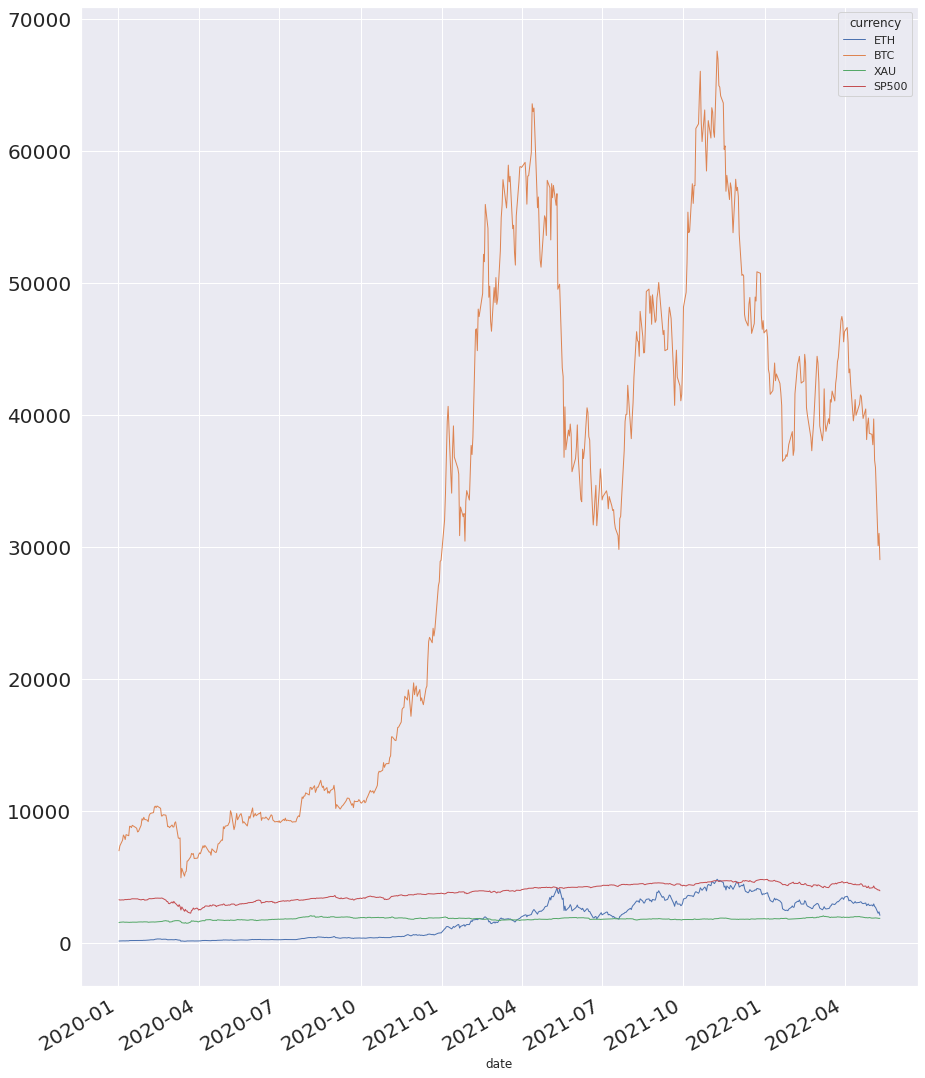

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903354,0.247888,0.924365
BTC,0.903354,1.000000,0.197100,0.873122
XAU,0.247888,0.197100,1.000000,0.376763
SP500,0.924365,0.873122,0.376763,1.000000


In [8]:
#hide ### Koreliacijos matrica.

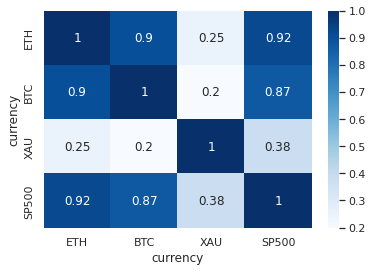

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')